In [16]:
from one.api import ONE
from iblatlas.regions import BrainRegions
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
one = ONE(
    base_url='https://openalyx.internationalbrainlab.org', 
    password='international', silent=True,
    # cache_dir='/expanse/lustre/scratch/yzhang39/temp_project/',
)

In [3]:
br = BrainRegions()
beryl_re = br.remap(br.id)
beryl_re = br.id2acronym(beryl_re)
beryl_re = np.unique(beryl_re)

In [4]:
filter_re = [re for re in beryl_re if re not in ['root', 'void', 'x', 'y']]

In [5]:
one.search_terms('remote', 'insertions')
region_ctn = {}
for re_idx, re in enumerate(filter_re):
    pids = one.search_insertions(atlas_acronym=[re], query_type='remote')
    eids = [one.pid2eid(pid)[0] for pid in pids]
    ctn = len(np.unique(eids))
    region_ctn[re] = ctn
    print(f'{re}: {re_idx+1}/{len(filter_re)}: {ctn} sessions')

AAA: 1/304: 3 sessions
ACAd: 2/304: 23 sessions
ACAv: 3/304: 19 sessions
ACB: 4/304: 24 sessions
AD: 5/304: 4 sessions
ADP: 6/304: 1 sessions
AHN: 7/304: 5 sessions
AId: 8/304: 11 sessions
AIp: 9/304: 8 sessions
AIv: 10/304: 8 sessions
AM: 11/304: 11 sessions
AMB: 12/304: 2 sessions
ANcr1: 13/304: 13 sessions
ANcr2: 14/304: 17 sessions
AOB: 15/304: 2 sessions
AON: 16/304: 16 sessions
AP: 17/304: 1 sessions
APN: 18/304: 58 sessions
APr: 19/304: 9 sessions
ARH: 20/304: 0 sessions
AT: 21/304: 4 sessions
AUDd: 22/304: 9 sessions
AUDp: 23/304: 6 sessions
AUDpo: 24/304: 5 sessions
AUDv: 25/304: 9 sessions
AV: 26/304: 11 sessions
AVP: 27/304: 3 sessions
AVPV: 28/304: 0 sessions
Acs5: 29/304: 0 sessions
B: 30/304: 0 sessions
BA: 31/304: 0 sessions
BLA: 32/304: 15 sessions
BMA: 33/304: 15 sessions
BST: 34/304: 17 sessions
CA1: 35/304: 175 sessions
CA2: 36/304: 36 sessions
CA3: 37/304: 98 sessions
CEA: 38/304: 16 sessions
CENT2: 39/304: 16 sessions
CENT3: 40/304: 30 sessions
CL: 41/304: 12 sessi

In [40]:
sorted_region_ctn = sorted(region_ctn.items(), key=lambda x: x[1], reverse=True)
sorted_region_ctn[:10]

[('CM', 207),
 ('DG', 181),
 ('CA1', 175),
 ('MRN', 119),
 ('LP', 105),
 ('CA3', 98),
 ('CP', 80),
 ('VISa', 72),
 ('SCm', 68),
 ('VISp', 67)]

In [42]:
re_viz = [x[0] for x in sorted_region_ctn[:50]]
ctn_viz = [x[1] for x in sorted_region_ctn[:50]]

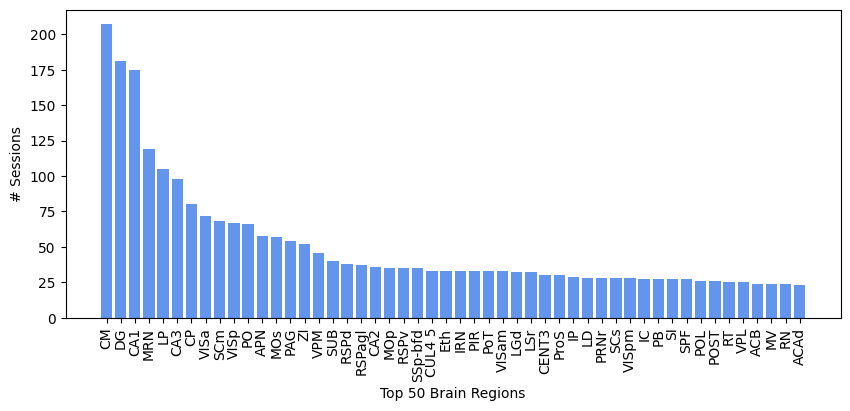

In [55]:
plt.figure(figsize=(10,4))
plt.bar(re_viz, ctn_viz, color='cornflowerblue')
plt.xticks(rotation=90)
plt.ylabel('# Sessions')
plt.xlabel('Top 50 Brain Regions');
# plt.savefig('region_count.png')

In [33]:
region_ctn_df = pd.DataFrame(region_ctn, index=['count']).T

In [35]:
region_ctn_df.to_csv('../data/region_count.csv')

List train / test EIDs for NEMO

In [7]:
with open('../data/target_eids.txt') as file:
    target_eids = [line.rstrip() for line in file]

In [8]:
split = np.load('../data/IBL_BWM_train_val_test_split.npz', allow_pickle=True)

In [9]:
train_pids = split['train_pids']
test_pids = split['test_pids']

In [ ]:
train_eids = []
test_eids = []
counter = 0
for pid in train_pids:
    train_eids.append(one.pid2eid(pid))
    counter += 1
    print(f'{counter}/{len(train_pids)}')

counter = 0
for pid in test_pids:
    test_eids.append(one.pid2eid(pid))
    counter += 1
    print(f'{counter}/{len(test_pids)}')

train_eids = np.unique(train_eids)
test_eids = np.unique(test_eids)

In [16]:
np.intersect1d(train_eids, target_eids)

array(['03cf52f6-fba6-4743-a42e-dd1ac3072343',
       '03d9a098-07bf-4765-88b7-85f8d8f620cc',
       '0802ced5-33a3-405e-8336-b65ebc5cb07c',
       '3638d102-e8b6-4230-8742-e548cd87a949',
       '4b00df29-3769-43be-bb40-128b1cba6d35',
       '4b7fbad4-f6de-43b4-9b15-c7c7ef44db4b',
       '51e53aff-1d5d-4182-a684-aba783d50ae5',
       '72cb5550-43b4-4ef0-add5-e4adfdfb5e02',
       '781b35fd-e1f0-4d14-b2bb-95b7263082bb',
       '7cb81727-2097-4b52-b480-c89867b5b34c',
       '88224abb-5746-431f-9c17-17d7ef806e6a',
       'a66f1593-dafd-4982-9b66-f9554b6c86b5',
       'a8a8af78-16de-4841-ab07-fde4b5281a03',
       'c4432264-e1ae-446f-8a07-6280abade813',
       'd0ea3148-948d-4817-94f8-dcaf2342bbbe',
       'd2832a38-27f6-452d-91d6-af72d794136c',
       'd57df551-6dcb-4242-9c72-b806cff5613a',
       'dac3a4c1-b666-4de0-87e8-8c514483cacf',
       'db4df448-e449-4a6f-a0e7-288711e7a75a',
       'ecb5520d-1358-434c-95ec-93687ecd1396',
       'f312aaec-3b6f-44b3-86b4-3a0c119c0438'], dtype='<U36'

In [21]:
np.intersect1d(test_eids, target_eids)

array(['15763234-d21e-491f-a01b-1238eb96d389',
       '4b7fbad4-f6de-43b4-9b15-c7c7ef44db4b',
       '781b35fd-e1f0-4d14-b2bb-95b7263082bb',
       '824cf03d-4012-4ab1-b499-c83a92c5589e',
       '88224abb-5746-431f-9c17-17d7ef806e6a',
       'a66f1593-dafd-4982-9b66-f9554b6c86b5',
       'c4432264-e1ae-446f-8a07-6280abade813'], dtype='<U36')

Plotting

In [95]:
eid = '824cf03d-4012-4ab1-b499-c83a92c5589e'

model = "iTransformer"

ratio = 0.3
mask_methods = ['mask_neuron', 'mask_causal', 'mask_temporal', 'mask_intra-region', 'mask_inter-region', 'mask_all_prompt']
eval_methods = ['co_smooth', 'forward_pred', 'intra_region', 'inter_region']
finetune_methods = ['choice_decoding', 'continuous_decoding']

save_path = Path(f'/expanse/lustre/scratch/yzhang39/temp_project/results/{eid}/eval/model_{model}/method_ssl/')

metrics_dict = {}
for mask in mask_methods:
    metrics_dict[mask] = {}
    if mask == 'mask_all_prompt':
        fname = 'mask_all'
        prompt = 'True'
    else:
        fname = mask
        prompt = 'False'
    for eval in eval_methods:
        metrics_dict[mask][eval] = {}
        try:
            r2 = np.load(save_path/fname/f'ratio_{ratio}'/'mask_token_False'/f'prompt_{prompt}'/'NEMO_False'/'no_channel_False'/eval/'r2.npy')
        except:
            r2 = np.zeros(2)
        try:
            bps = np.load(save_path/fname/f'ratio_{ratio}'/'mask_token_False'/f'prompt_{prompt}'/'NEMO_False'/'no_channel_False'/eval/'bps.npy')
        except:
            bps = 0
        metrics_dict[mask][eval]['r2_psth'] = np.nanmean(r2.T[0]) 
        metrics_dict[mask][eval]['r2_per_trial'] = np.nanmean(r2.T[1]) 
        metrics_dict[mask][eval]['bps'] = np.nanmean(bps) 
    for eval in finetune_methods:
        metrics_dict[mask][eval] = {}
        if eval == "choice_decoding":                
            try:
                acc = np.load(save_path/fname/f'ratio_{ratio}'/'mask_token_False'/f'prompt_{prompt}'/'NEMO_False'/'no_channel_False'/eval/'choice_results.npy', allow_pickle=True).item()['acc']
            except:
                acc = np.zeros(1)
            metrics_dict[mask][eval]['metric'] = acc
        elif eval == "continuous_decoding":
            try:
                r2 = np.load(
                    save_path/fname/f'ratio_{ratio}'/'mask_token_False'/f'prompt_{prompt}'/'NEMO_False'/'no_channel_False'/eval/'whisker-motion-energy_results.npy', allow_pickle=True
                ).item()['rsquared']
            except:
                r2 = np.zeros(1)
            metrics_dict[mask][eval]['metric'] = r2

In [96]:
N = len(mask_methods)
K = len(eval_methods)
M = len(finetune_methods) 
P = 0
r2_psth_mat, r2_per_trial_mat, bps_mat = np.zeros((N, K)), np.zeros((N, K)), np.zeros((N, K))
behave_mat = np.zeros((N + P, M))
for i, mask in enumerate(mask_methods):
    for j, eval in enumerate(eval_methods):
        r2_psth_mat[i,j] = metrics_dict[mask][eval]['r2_psth']
        r2_per_trial_mat[i,j] = metrics_dict[mask][eval]['r2_per_trial']
        bps_mat[i,j] = metrics_dict[mask][eval]['bps']
    for j, eval in enumerate(finetune_methods):
        behave_mat[i,j] = metrics_dict[mask][eval]['metric']

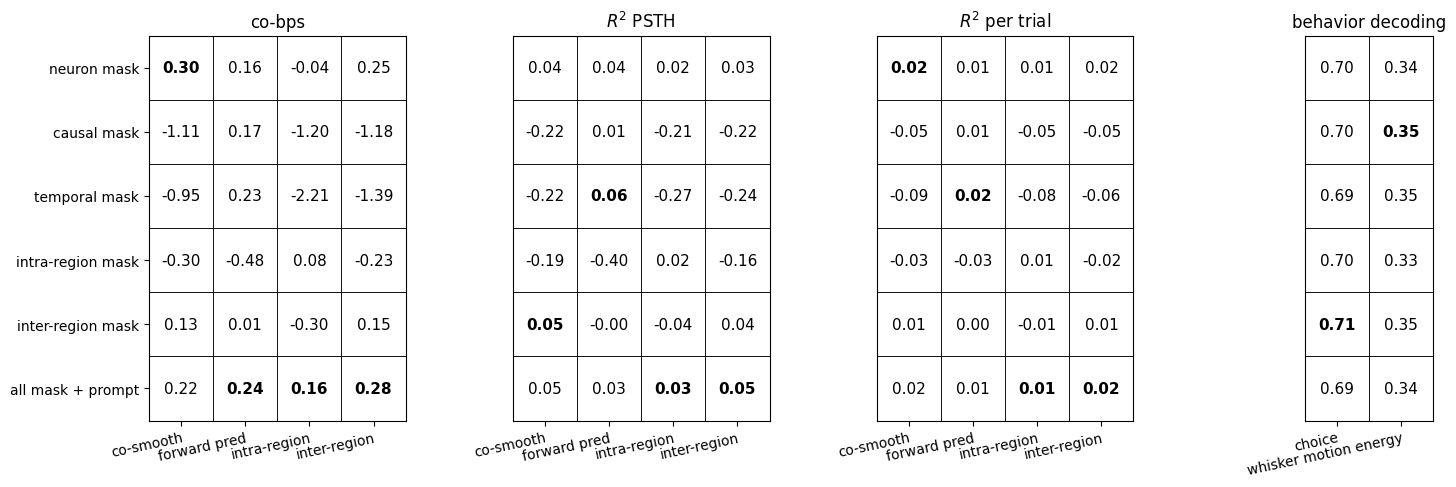

In [98]:
def rect(pos, ax):
    r = plt.Rectangle(pos-0.5, 1,1, facecolor="none", edgecolor="k", linewidth=.5)
    ax.add_patch(r)

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

mat = bps_mat
im0 = axes[0].imshow(mat, cmap=ListedColormap(['white']))
axes[0].set_title("co-bps")

x,y = np.meshgrid(np.arange(mat.shape[1]),np.arange(mat.shape[0]))
m = np.c_[x[mat.astype(bool)],y[mat.astype(bool)]]
for pos in m:
    rect(pos, axes[0])

for j in range(len(eval_methods)):
    for i in range(len(mask_methods)):
        color = 'k'
        if mat[i, j] == mat[:, j].max(): 
            text = axes[0].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11, weight='bold')
        else:
            text = axes[0].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11)

mat = r2_psth_mat
im1 = axes[1].imshow(mat, cmap=ListedColormap(['white']))
axes[1].set_title(r"$R^2$ PSTH")

x,y = np.meshgrid(np.arange(mat.shape[1]),np.arange(mat.shape[0]))
m = np.c_[x[mat.astype(bool)],y[mat.astype(bool)]]
for pos in m:
    rect(pos, axes[1])

for i in range(len(mask_methods)):
    for j in range(len(eval_methods)):
        color = 'k'
        if mat[i, j] == mat[:, j].max(): 
            text = axes[1].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11, weight='bold')
        else:
            text = axes[1].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11)

mat = r2_per_trial_mat
im2 = axes[2].imshow(mat, cmap=ListedColormap(['white']))
axes[2].set_title(r"$R^2$ per trial")

x,y = np.meshgrid(np.arange(mat.shape[1]),np.arange(mat.shape[0]))
m = np.c_[x[mat.astype(bool)],y[mat.astype(bool)]]
for pos in m:
    rect(pos, axes[2])

for i in range(len(mask_methods)):
    for j in range(len(eval_methods)):
        color = 'k'
        if mat[i, j] == mat[:, j].max(): 
            text = axes[2].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11, weight='bold')
        else:
            text = axes[2].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11)

mat = behave_mat
im2 = axes[3].imshow(mat, cmap=ListedColormap(['white']))
axes[3].set_title(r"behavior decoding")

x,y = np.meshgrid(np.arange(mat.shape[1]),np.arange(mat.shape[0]))
m = np.c_[x[mat.astype(bool)],y[mat.astype(bool)]]
for pos in m:
    rect(pos, axes[3])

for i in range(N+P):
    for j in range(len(finetune_methods)):
        color = 'k'
        if mat[i, j] == mat[:, j].max(): 
            text = axes[3].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11, weight='bold')
        else:
            text = axes[3].text(j, i, f'{mat[i, j]:.2f}',
                       ha="center", va="center", color=color, fontsize=11)

for i, ax in enumerate(axes):
    if model == "NDT2":
        if i == 0:
            ax.set_yticks(np.arange(N), labels=['neuron mask','causal mask', 'intra-region mask', 'inter-region mask', 'temporal mask', 'neuron+temporal+causal mask', 'all mask', 'random token mask'])
        else:
            ax.set_yticks([],[])
    else:
        if i == 0:
            ax.set_yticks(np.arange(N), labels=['neuron mask','causal mask', 'temporal mask', 'intra-region mask', 'inter-region mask', 'all mask + prompt'])
        else:
            ax.set_yticks([],[])
    if i < len(axes)-1:
        ax.set_xticks(np.arange(K), labels=['co-smooth','forward pred', 'intra-region', 'inter-region'])
    else:
        ax.set_xticks(np.arange(M), labels=['choice', 'whisker motion energy'])
        if i == 0:
            ax.set_yticks(np.arange(N+P), 
                    labels=['neuron mask','causal mask', 'temporal mask', 'intra-region mask', 'inter-region mask', 'all mask + prompt'])
        else:
            ax.set_yticks([],[])
            
    plt.setp(ax.get_xticklabels(), rotation=12, ha="right",
             rotation_mode="anchor")

# fig.tight_layout()
plt.savefig(f'./{model}_metrics.png', dpi=200)

In [2]:
eids = [
    '51e53aff-1d5d-4182-a684-aba783d50ae5',
    'ff96bfe1-d925-4553-94b5-bf8297adf259',
    '72cb5550-43b4-4ef0-add5-e4adfdfb5e02',
    '824cf03d-4012-4ab1-b499-c83a92c5589e',
    '746d1902-fa59-4cab-b0aa-013be36060d5'
]

In [3]:
embed_types = ['region + unit', 'region + NEMO', 'region + unit + NEMO']

In [7]:
model = "iTransformer"
ratio = 0.3

eval_methods = ['co_smooth', 'forward_pred', 'intra_region', 'inter_region']
finetune_methods = ['choice_decoding', 'continuous_decoding']

metrics_dict = {}
for eid in eids:
    metrics_dict[eid] = {}
        
    for eval in eval_methods:
        metrics_dict[eid][eval] = []
        for embed in embed_types:
            if embed == 'region + unit':
                embed_nemo = False
                no_channel = False
            elif embed == 'region + NEMO':
                embed_nemo = True
                no_channel = True
            else:
                embed_nemo = True
                no_channel = False
            save_path = Path(f'/expanse/lustre/scratch/yzhang39/temp_project/results/{eid}/eval/model_{model}/method_ssl/')
            try:
                bps = np.load(save_path/'mask_all'/f'ratio_{ratio}'/'mask_token_False'/'prompt_True'/f'NEMO_{embed_nemo}'/f'no_channel_{no_channel}'/'wvf_only_True'/eval/'bps.npy')
            except:
                bps = 0
            metrics_dict[eid][eval].append(np.nanmean(bps))
            
    for eval in finetune_methods:
        metrics_dict[eid][eval] = []
        for embed in embed_types:
            if embed == 'region + unit':
                embed_nemo = False
                no_channel = False
            elif embed == 'region + NEMO':
                embed_nemo = True
                no_channel = True
            else:
                embed_nemo = True
                no_channel = False
            if eval == "choice_decoding":                
                try:
                    acc = np.load(save_path/'mask_all'/f'ratio_{ratio}'/'mask_token_False'/'prompt_True'/f'NEMO_{embed_nemo}'/f'no_channel_{no_channel}'/'wvf_only_True'/eval/'choice_results.npy', allow_pickle=True).item()['acc']
                except:
                    acc = np.zeros(1)
                metrics_dict[eid][eval].append(acc)
            elif eval == "continuous_decoding":
                try:
                    r2 = np.load(
                        save_path/'mask_all'/f'ratio_{ratio}'/'mask_token_False'/'prompt_True'/f'NEMO_{embed_nemo}'/f'no_channel_{no_channel}'/'wvf_only_True'/eval/'whisker-motion-energy_results.npy', allow_pickle=True
                    ).item()['rsquared']
                except:
                    r2 = np.load(
                        save_path/'mask_all'/f'ratio_{ratio}'/'mask_token_False'/'prompt_True'/f'NEMO_{embed_nemo}'/f'no_channel_{no_channel}'/'wvf_only_True'/eval/'wheel-speed_results.npy', allow_pickle=True
                    ).item()['rsquared']
                metrics_dict[eid][eval].append(r2)

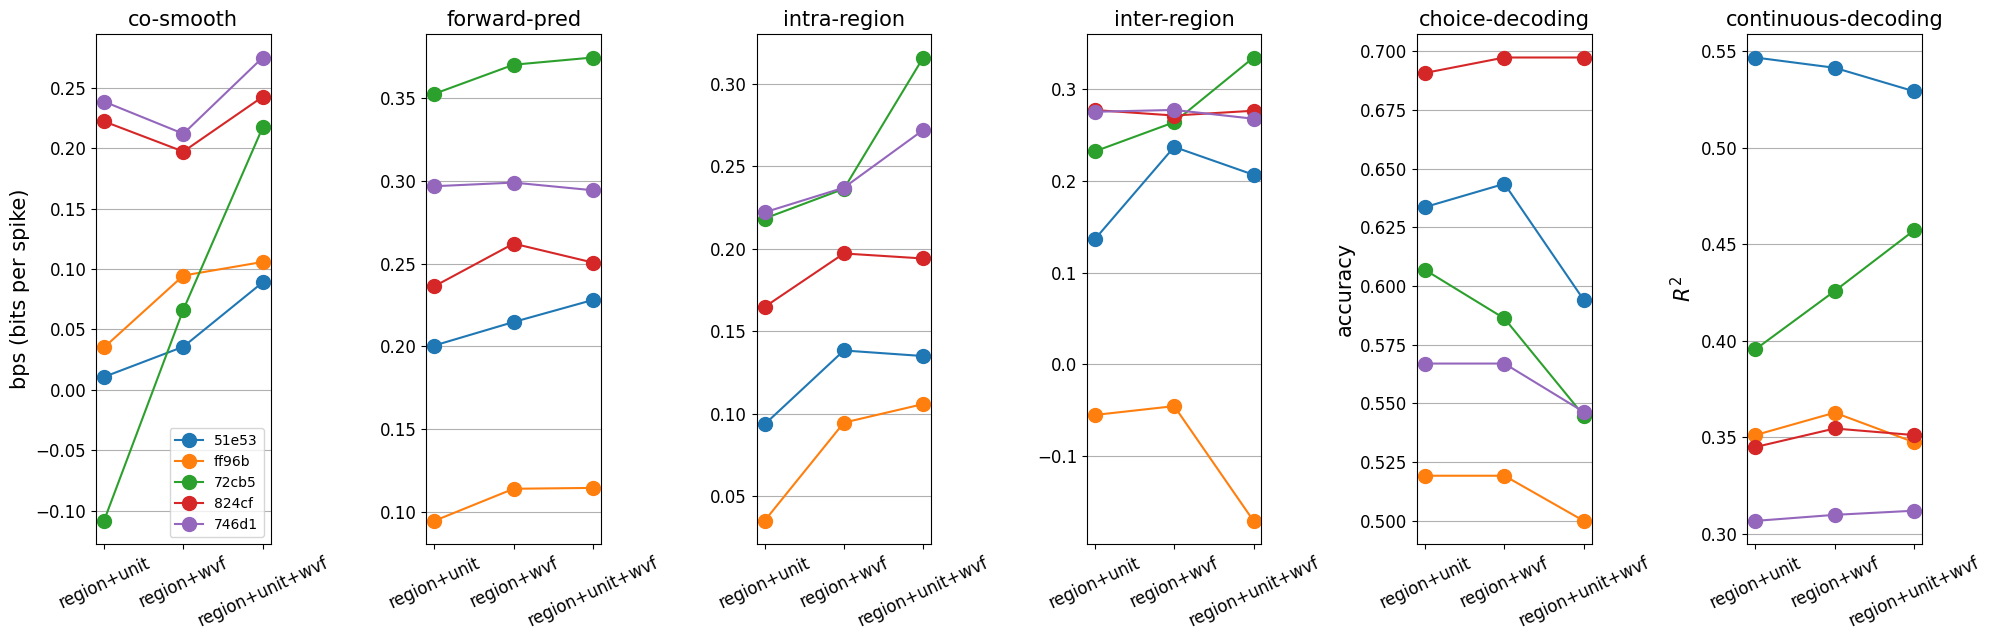

In [10]:
fig, axes = plt.subplots(1, 6, figsize=(20, 6.5))

for eid in eids:
    for j, eval in enumerate(eval_methods + finetune_methods):
        axes[j].plot(metrics_dict[eid][eval], marker='.', markersize=20, label=eid[:5])
        axes[j].yaxis.grid()
        axes[j].set_title('-'.join(eval.split('_')), fontsize=15)
        axes[j].set_xticks([0, 1, 2], ['region+unit', 'region+wvf', 'region+unit+wvf'], rotation=25)
        axes[j].tick_params(axis='both', which='major', labelsize=12)
        if j <= 3:
            axes[0].set_ylabel('bps (bits per spike)', fontsize=15)
        elif j == 4:
            axes[j].set_ylabel('accuracy', fontsize=15)
        else:
            axes[j].set_ylabel(r'$R^2$', fontsize=15)
axes[0].legend()
plt.tight_layout()
plt.savefig(f'./NEMO_single_session_wvf_only.png', dpi=200)